In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
import pickle

# Load the dataset
df = pd.read_csv('/Users/saniahassan/Downloads/Glassdoor_salary_data_cleaned.csv')  # Ensure the path is correctly specified

# Preview the dataframe
print(df.columns)

# Select relevant columns for modeling
model_data = df[['avg_salary', 'Headquarters', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'hourly',
                 'employer_provided', 'job_state', 'same_state', 'age', 'python_yn', 'spark', 'aws', 'excel',
                 'Job Title']]

# Convert categorical data into numerical data
df_dummies = pd.get_dummies(model_data)

# Define the features and target variable
X = df_dummies.drop('avg_salary', axis=1)
y = df_dummies['avg_salary'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Ordinary Least Squares Regression
X_train_sm = sm.add_constant(X_train)  # Adding a constant for statsmodels
model_sm = sm.OLS(y_train, X_train_sm)
results_sm = model_sm.fit()
print(results_sm.summary())

# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_cv_score = np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))
print("Linear Regression CV Score:", lm_cv_score)

# Lasso Regression
lr = Lasso(alpha=0.05)
lr.fit(X_train, y_train)
lr_cv_score = np.mean(cross_val_score(lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))
print("Lasso Regression CV Score:", lr_cv_score)

# Random Forest
rf = RandomForestRegressor()
rf_cv_score = np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))
print("Random Forest CV Score:", rf_cv_score)

# Hyperparameter Optimization for Random Forest
params = {'n_estimators': range(10, 300, 10), 'criterion': ['squared_error', 'absolute_error'], 'max_features': ['auto', 'sqrt', 'log2']}
gs = GridSearchCV(rf, params, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)
print("Best Score from GridSearchCV:", gs.best_score_)
print("Best Estimator from GridSearchCV:", gs.best_estimator_)

# Test data prediction
tpred_lm = lm.predict(X_test)
tpred_lml = lr.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

# Evaluate the model
print("MAE Linear Model:", mean_absolute_error(y_test, tpred_lm))
print("MAE Lasso Model:", mean_absolute_error(y_test, tpred_lml))
print("MAE Random Forest Model:", mean_absolute_error(y_test, tpred_rf))

# Save the model using pickle
model_file = 'model_rf.pkl'
pickle.dump(gs.best_estimator_, open(model_file, "wb"))

# Load the model from disk
loaded_model = pickle.load(open(model_file, 'rb'))
test_pred = loaded_model.predict(X_test.iloc[1,:].values.reshape(1,-1))
print("Test Prediction for one instance:", test_pred)


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     67.43
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          3.78e-116
Time:                        09:15:04   Log-Likelihood:                -1431.0
No. Observations:                 556   AIC:                             3628.
Df Resi

Linear Regression CV Score: -817130466.0738754
Lasso Regression CV Score: -19.16790711730776
Random Forest CV Score: -18.028082437275984


KeyboardInterrupt: 

In [2]:
import pandas as pd

# Assuming 'df' is your DataFrame and it's already been defined

# Calculate min, max, and avg salary for each job role
salary_stats = df.groupby('Job Title')['min_salary', 'max_salary', 'avg_salary'].agg(['min', 'max', 'mean']).reset_index()

# Renaming the columns appropriately
salary_stats.columns = [
    'Job Title',
    'Min Salary Min', 'Min Salary Max', 'Min Salary Mean',
    'Max Salary Min', 'Max Salary Max', 'Max Salary Mean',
    'Avg Salary Min', 'Avg Salary Max', 'Avg Salary Mean'
]

# Output the DataFrame to check the result
salary_stats.head()



/var/folders/lt/7wd4f8jd18q0f8rcskndcq100000gn/T/ipykernel_8825/109766986.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_stats = df.groupby('Job Title')['min_salary', 'max_salary', 'avg_salary'].agg(['min', 'max', 'mean']).reset_index()


,Job Title,Min Salary Min,Min Salary Max,Min Salary Mean,Max Salary Min,Max Salary Max,Max Salary Mean,Avg Salary Min,Avg Salary Max,Avg Salary Mean
0,Ag Data Scientist,60,60,60.0,101,101,101.0,80.5,80.5,80.5
1,Analytics - Business Assurance Data Analyst,31,31,31.0,55,55,55.0,43.0,43.0,43.0
2,Analytics Consultant,52,52,52.0,81,81,81.0,66.5,66.5,66.5
3,Analytics Manager,59,59,59.0,116,116,116.0,87.5,87.5,87.5
4,Analytics Manager - Data Mart,42,42,42.0,86,86,86.0,64.0,64.0,64.0


/var/folders/lt/7wd4f8jd18q0f8rcskndcq100000gn/T/ipykernel_8825/1225916832.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_stats = df.groupby('Job Title')['min_salary', 'max_salary', 'avg_salary'].agg(['min', 'max', 'mean']).reset_index()


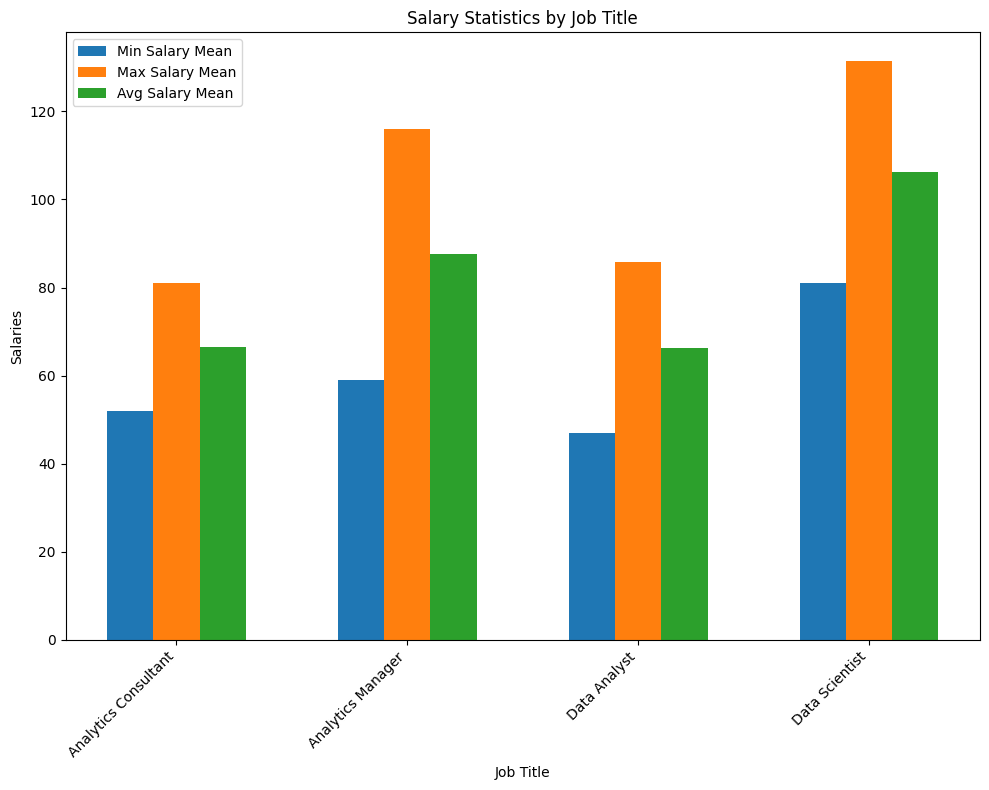

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already been defined

# Calculate min, max, and avg salary for each job role
salary_stats = df.groupby('Job Title')['min_salary', 'max_salary', 'avg_salary'].agg(['min', 'max', 'mean']).reset_index()

# Renaming the columns appropriately
salary_stats.columns = [
    'Job Title',
    'Min Salary Min', 'Min Salary Max', 'Min Salary Mean',
    'Max Salary Min', 'Max Salary Max', 'Max Salary Mean',
    'Avg Salary Min', 'Avg Salary Max', 'Avg Salary Mean'
]

# Filter for specific job titles
target_titles = ['Data Analyst', 'Analytics Manager-Data mart', 'Data Scientist', 'Analytics Consultant', 'Analytics Manager']
filtered_stats = salary_stats[salary_stats['Job Title'].isin(target_titles)]

# Setting up the bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# We'll just plot the mean values for clarity and simplicity
bar_width = 0.2  # Width of the bars
index = range(len(filtered_stats))  # Index for job titles

# Create bars for each statistic
rects1 = ax.bar(index, filtered_stats['Min Salary Mean'], bar_width, label='Min Salary Mean')
rects2 = ax.bar([p + bar_width for p in index], filtered_stats['Max Salary Mean'], bar_width, label='Max Salary Mean')
rects3 = ax.bar([p + bar_width * 2 for p in index], filtered_stats['Avg Salary Mean'], bar_width, label='Avg Salary Mean')

# Add labels, title, and legend
ax.set_xlabel('Job Title')
ax.set_ylabel('Salaries')
ax.set_title('Salary Statistics by Job Title')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(filtered_stats['Job Title'], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()  # Adjusts plot parameters to give a pleasing layout
plt.show()
